# Diabeties Prediction:

* Logistic Regression
* K-Nearest Neighbors
* Support Vector Machine
* Random Forest

## Dataset Description

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.All the patients here are female 21 years or older.It contains the following columns:
 
  - Pregnancies: Number of times pregnant
  - Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
  - BloodPressure: Diastolic blood pressure (mm Hg)
  - SkinThickness: Triceps skin fold thickness (mm)
  - Insulin: 2-Hour serum insulin (mu U/ml)
  - BMI: Body mass index (weight in kg/(height in m)^2)
  - DiabetesPedigreeFunction: Diabetes pedigree function
  - Age: Age (years)
  - Outcome: Class variable (0 or 1)

In [20]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn")
import seaborn as sns

In [2]:
df = pd.read_csv("data/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Hmmm No missing values.... Cool 

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Hmm.... 0 as a minimum for Insulin, BMI, Glucose, BloodPressure??? ---- Missing values must be encoded as 0

In [11]:
wrong_data = df.loc[:,'Glucose':'BMI']
wrong_data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1
...,...,...,...,...,...
763,101,76,48,180,32.9
764,122,70,27,0,36.8
765,121,72,23,112,26.2
766,126,60,0,0,30.1


In [12]:
# lets replace 0 with NaN
wrong_data.replace(0,np.nan,inplace=True) 
wrong_data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9
764,122.0,70.0,27.0,NaN,36.8
765,121.0,72.0,23.0,112.0,26.2
766,126.0,60.0,NaN,NaN,30.1


In [13]:
df.loc[:,'Glucose':'BMI'] = wrong_data
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#### Now we can work with missing values 

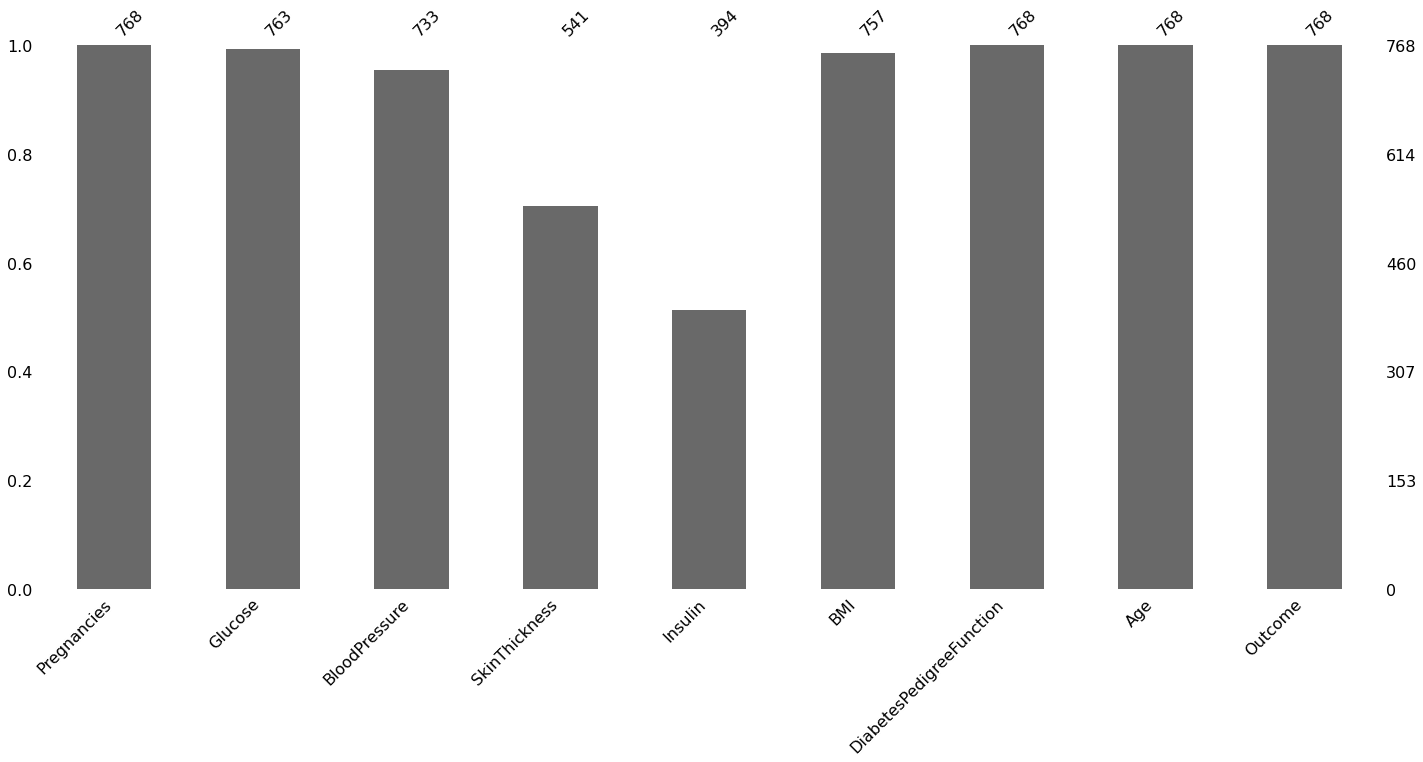

In [17]:
import missingno as mn
mn.bar(df);

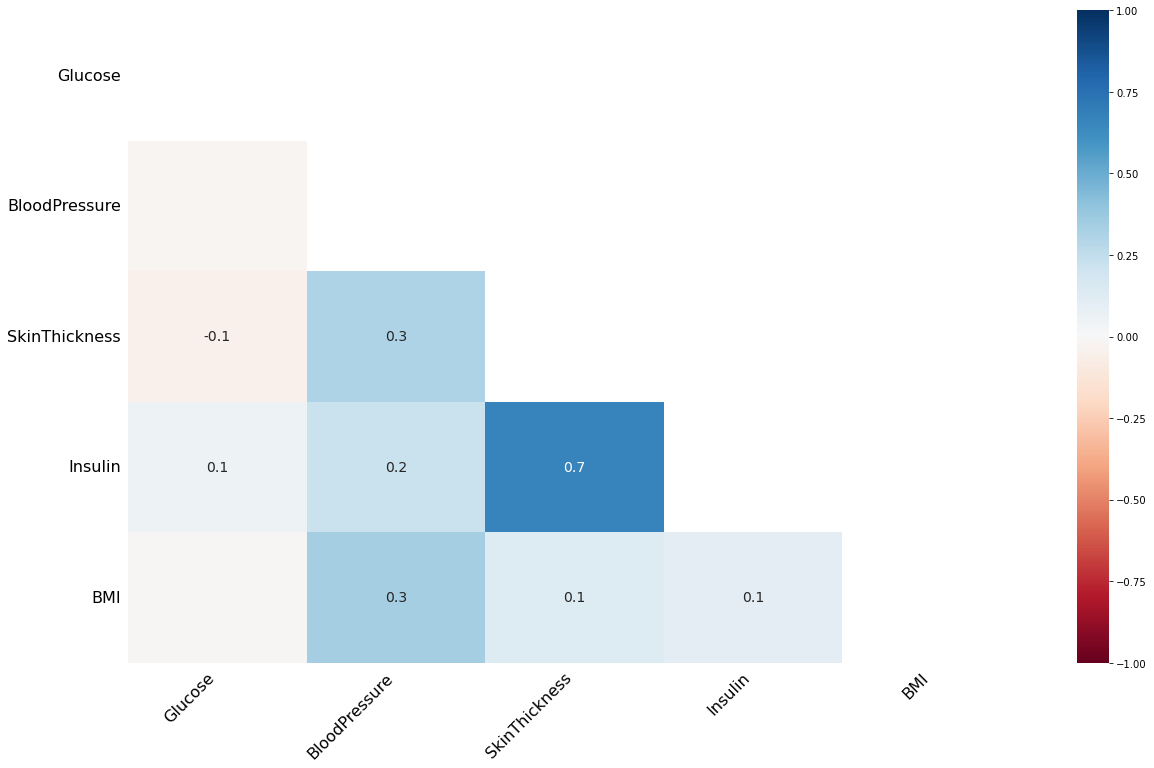

In [18]:
mn.heatmap(df);

#### There is a heavy correlation between Skin Thickness and Insulin

In [19]:
df.dropna(subset=['Glucose','BMI'],inplace=True)

In [21]:
from sklearn.impute import KNNImputer

In [22]:
df_knn = df.copy()

In [23]:
knn_imputer = KNNImputer()
df_knn.loc[:,:] = knn_imputer.fit_transform(df_knn)

In [24]:
df_knn.shape

(752, 9)

In [25]:
df_knn

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,165.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,35.2,134.2,30.1,0.349,47.0,1.0


In [26]:
df_knn.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,3.851064,121.941489,72.413830,29.102128,154.656649,32.454654,0.473051,33.312500,0.351064
std,3.375189,30.601198,12.223965,9.473877,98.872359,6.928926,0.330108,11.709395,0.477621
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,90.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,135.000000,32.300000,0.377000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,34.650000,191.850000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Outliers Checking 

In [27]:
df1 = df_knn.copy()

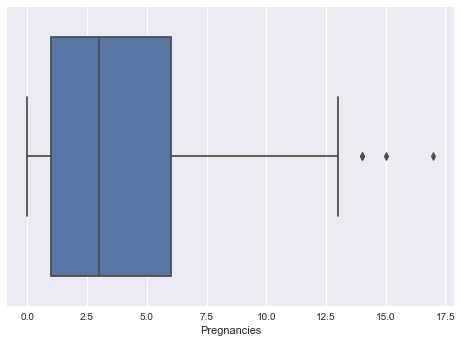

In [30]:
sns.boxplot(data=df_knn,x='Pregnancies');

In [31]:
# Removing values above 13 as they are outliers
df1 = df1[df1['Pregnancies']<=13]

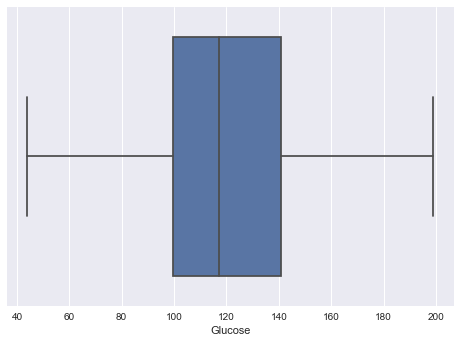

In [32]:
sns.boxplot(data=df_knn,x='Glucose');

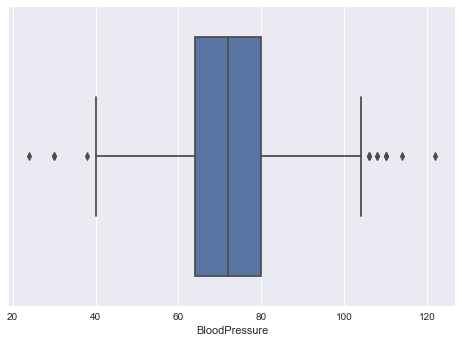

In [33]:
sns.boxplot(data=df_knn,x='BloodPressure');

In [34]:
# BP <40 is an outlier
df1 = df1[df1['BloodPressure']>40]

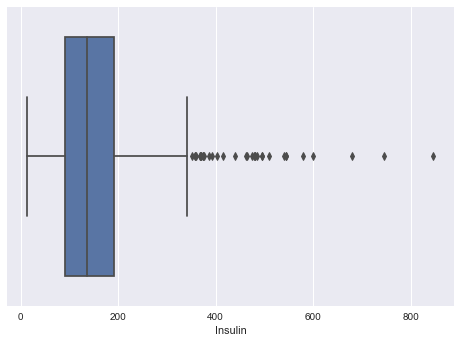

In [35]:
sns.boxplot(data=df_knn,x='Insulin');

In [36]:
# Insulin >400 is an outlier
df1 = df1[df1['Insulin']<=400]

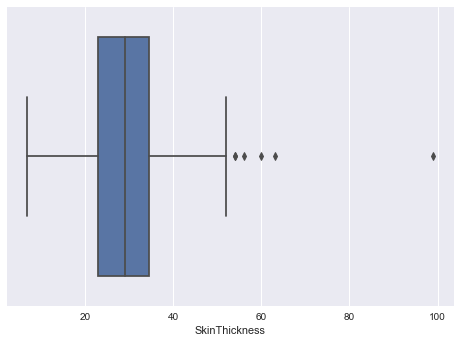

In [37]:
sns.boxplot(data=df_knn,x='SkinThickness');

In [38]:
# Skinthickness = 99 is an outlier
df1=df1[df1['SkinThickness']<80]

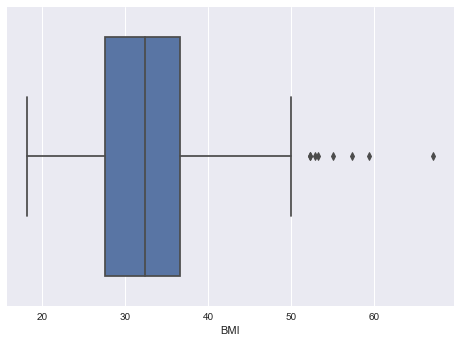

In [39]:
sns.boxplot(data=df_knn,x='BMI');

In [40]:
# BMI above 60 removed
df1 = df1[df1['BMI']<=60]

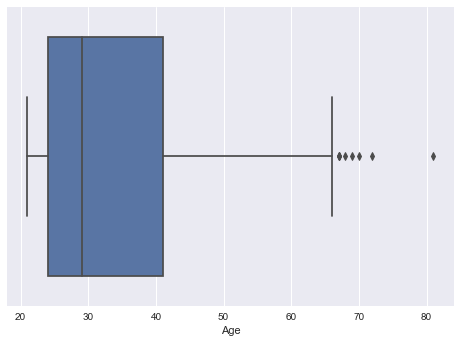

In [41]:
sns.boxplot(data=df_knn,x='Age');

In [42]:
# Age 81 removed
df1 = df1[df1['Age']<=75]

In [43]:
print("Total Outlier Removed: ", df_knn.shape[0]-df1.shape[0])

Total Outlier Removed:  33


## Exploratory Data Analysis

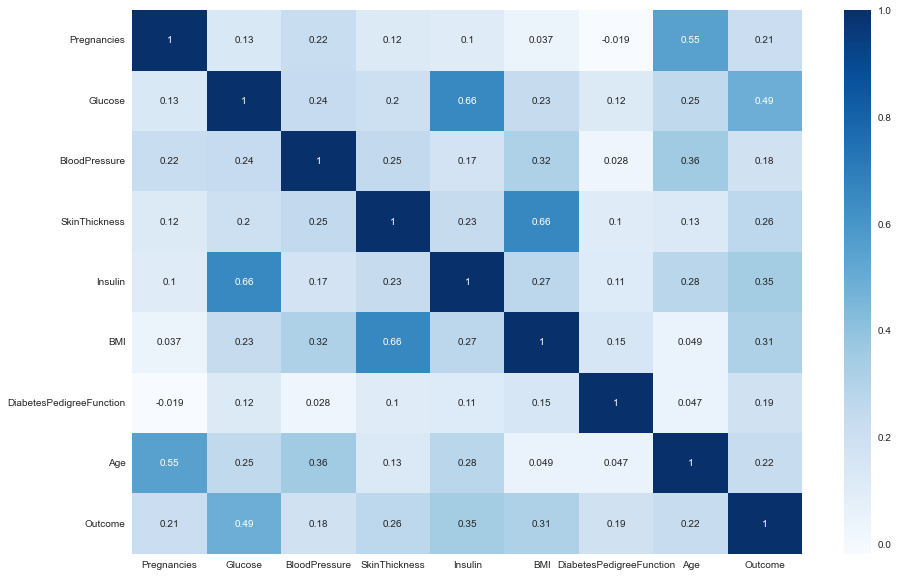

In [45]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,cmap='Blues');

#### Insights
- (Glucose and Insulin) & (BMI and SkinThickness) are highly correlated - 0.66
- Age and Pregnancies are second in correlation - 0.55
- Glucose, Insulin and BMI plays a vital role in the Outcome

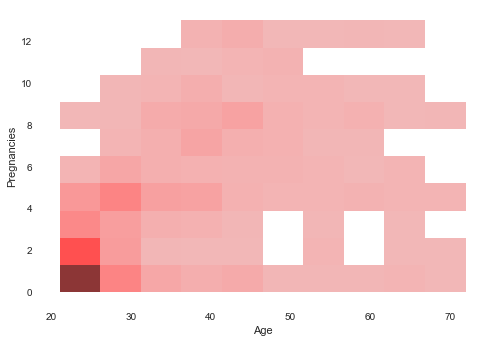

In [64]:
sns.set_style('white')
sns.histplot(data=df1,x="Age",y="Pregnancies",color="red",bins=10);

#### Females between age 35 to 45 have more children while those around age 20 generally have 0 children.

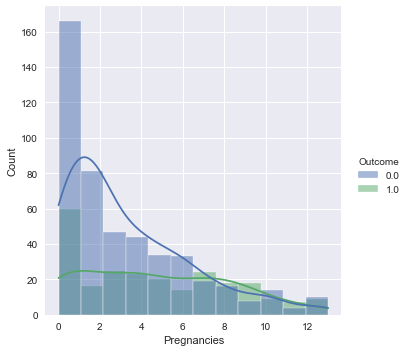

In [77]:
sns.set_style('darkgrid')
sns.displot(data=df1,x='Pregnancies',hue='Outcome',kde=True);

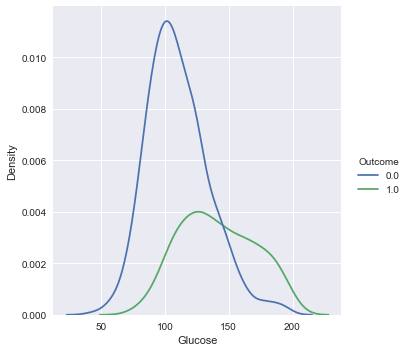

In [78]:
sns.displot(data=df1,x='Glucose',hue='Outcome',kind='kde');

#### Diabetic people have Glucose level between 100-200, but normal people have glucose normally distributed around 100

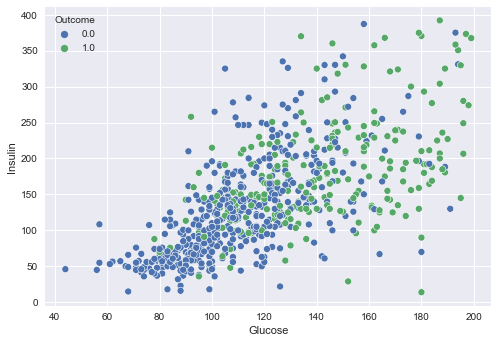

In [79]:
sns.scatterplot(data=df1,x='Glucose',y='Insulin',hue='Outcome');

#### We can clearly see people with diabetes have low level of Insulin and high glucose

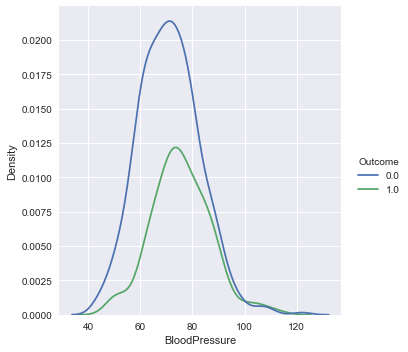

In [80]:
sns.displot(data=df1,x='BloodPressure',hue='Outcome',kind='kde');

#### BloodPressure for both type of people is normally distributed around 75 and have a little coorelation (0.18) as seen above.

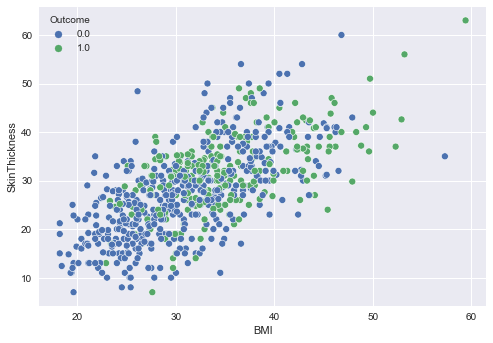

In [81]:
sns.scatterplot(data=df1,x='BMI',y='SkinThickness',hue='Outcome');

#### BMI between 18.5-24.5 is considered as normal while BMI above 30 is considered as obese. People having higher BMI are more prone to Diabeties

In [84]:
df1['Outcome'].value_counts(normalize=True)*100

0.0    66.20306
1.0    33.79694
Name: Outcome, dtype: float64

#### Dataset is imbalance with 65% of input as non diabetic. We will use SMOTE to balance the classes

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

In [86]:
X = df1.drop('Outcome',axis=1)
y = df1['Outcome']

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((503, 8), (216, 8), (503,), (216,))

In [212]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train,y_train)

In [213]:
X_res.shape, y_res.shape

((666, 8), (666,))

In [214]:
print("Records increased from {} to {} in training set".format(X_train.shape[0],X_res.shape[0]))
print("New Records: ",X_res.shape[0]-X_train.shape[0])

Records increased from 503 to 666 in training set
New Records:  163


## Logistic Regression

In [215]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [216]:
estimator = Pipeline([('scaler', StandardScaler()),
                     ('logistic_regression', LogisticRegression(solver='liblinear'))])
params = {"logistic_regression__penalty" : ['l1','l2'],
    "logistic_regression__C" : np.linspace(0.001,100)
}
grid = GridSearchCV(estimator,
                   params,
                   cv=5,
                   verbose=True,
                   n_jobs=-1,
                   scoring='recall')

In [217]:
%%time
grid.fit(X_res,y_res)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Wall time: 1.21 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic_regression',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logistic_regression__C': array([1.00000000e-03, 2.04179592e+00, 4.08259184e+00, 6.12338776e+00,
       8.16418367e+00, 1.02049796e+01, 1.22457755e+01, 1.42865714e+01,
       1.63273673e+01, 1.83681633e+01, 2.0408959...
       5.71432857e+01, 5.91840816e+01, 6.12248776e+01, 6.32656735e+01,
       6.53064694e+01, 6.73472653e+01, 6.93880612e+01, 7.14288571e+01,
       7.34696531e+01, 7.55104490e+01, 7.75512449e+01, 7.95920408e+01,
       8.16328367e+01, 8.36736327e+01, 8.57144286e+01, 8.77552245e+01,
       8.97960204e+01, 9.18368163e+01, 9.38776122e+01, 9.59184082e+01,
       9.79592041e+01, 1.00000000e+02]),
                         'logistic_regression__penalty': ['l1', 'l2']},
             scoring='recall'

In [218]:
grid.best_params_

{'logistic_regression__C': 2.0417959183673466,
 'logistic_regression__penalty': 'l2'}

In [219]:
y_pred = grid.predict(X_test)

In [220]:
print("Actual Label:    ",list(y_test[10:20].astype('int32')))
print("Predicted Label: ",list(y_pred[10:20].astype('int32')))

Actual Label:     [0, 0, 1, 0, 1, 0, 1, 0, 0, 0]
Predicted Label:  [0, 0, 0, 1, 1, 0, 1, 0, 0, 0]


In [221]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, r2_score

In [222]:
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))
print("\nROC AUC Score: ",roc_auc_score(y_test,y_pred))
print("\nR^2 Score: ",r2_score(y_pred,y_test))
print("\nAccuracy Score: ", accuracy_score(y_test,y_pred))

Confusion Matrix: 
 [[106  37]
 [ 12  61]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.74      0.81       143
         1.0       0.62      0.84      0.71        73

    accuracy                           0.77       216
   macro avg       0.76      0.79      0.76       216
weighted avg       0.81      0.77      0.78       216


ROC AUC Score:  0.7884375898074528

R^2 Score:  0.08474576271186451

Accuracy Score:  0.7731481481481481


### DEFINATION
- __PRECISION__ - Precision is defined as the ratio of true positives to the sum of true and false positives.
- __RECALL__ - Recall is defined as the ratio of true positives to the sum of true positives and false negatives.
- __F1-SCORE__ - The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.
- __SUPPORT__ - Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.

A recall of __84%__ is not bad, let's see what other models can do

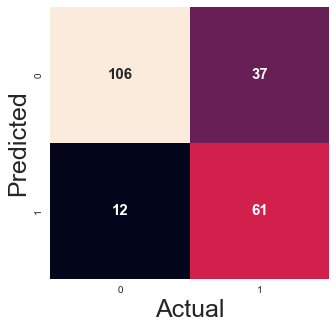

In [126]:
fig, ax = plt.subplots(figsize=(5,5))
ax=sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt='d', annot_kws={'size': 15,"weight":"bold"},cbar=False)
ax.set_ylabel("Predicted", fontsize = 25)
ax.set_xlabel("Actual", fontsize = 25);

## K Nearest Neighbor - KNN

In [130]:
from sklearn.neighbors import KNeighborsClassifier

In [131]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((503, 8), (216, 8), (503,), (216,))

In [133]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train,y_train)

In [134]:
X_res.shape, y_res.shape

((666, 8), (666,))

In [167]:
# to optimize value of K
from sklearn.metrics import recall_score, f1_score, accuracy_score
max_k = 40
recall_scores = list()
f1_scores = list()
for k in range(1,max_k):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_res,y_res)
    
    y_pred = knn.predict(X_test)
    recall_scores.append((k,round(recall_score(y_test,y_pred),4)))
    f1_scores.append((k,round(f1_score(y_test,y_pred),4)))

r_results = pd.DataFrame(recall_scores,columns=['K','Recall'])
f1_results = pd.DataFrame(f1_scores,columns=['K','F1-Scroe'])

In [142]:
r_results.head()

,K,Recall
0,1,0.5205
1,2,0.5205
2,3,0.6986
3,4,0.6849
4,5,0.7534


In [143]:
f1_results.head()

,K,F1-Scroe
0,1,0.5135
1,2,0.5135
2,3,0.6145
3,4,0.6061
4,5,0.6358


<Figure size 6400x4400 with 0 Axes>

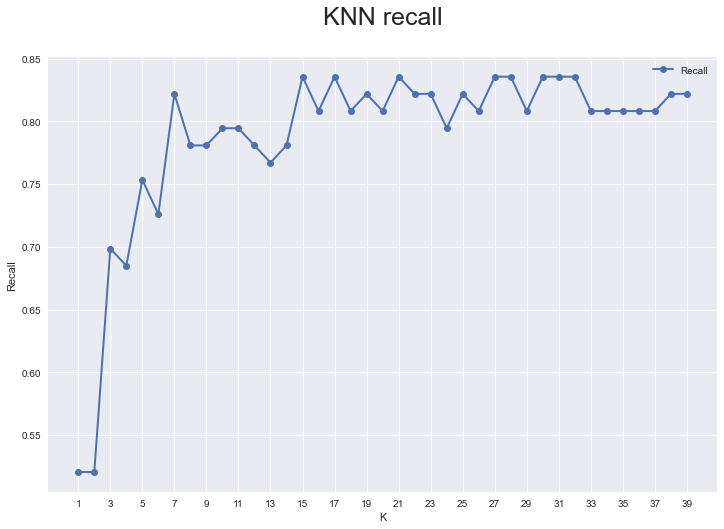

In [158]:
sns.set_style("darkgrid")
plt.figure(dpi=800)
ax = r_results.set_index("K").plot(figsize=(12,8),linewidth=2, marker='o')
ax.set(xlabel='K',ylabel='Recall')
ax.set_xticks(range(1,max_k,2))
plt.title("KNN recall\n", fontsize=25)

<Figure size 6400x4400 with 0 Axes>

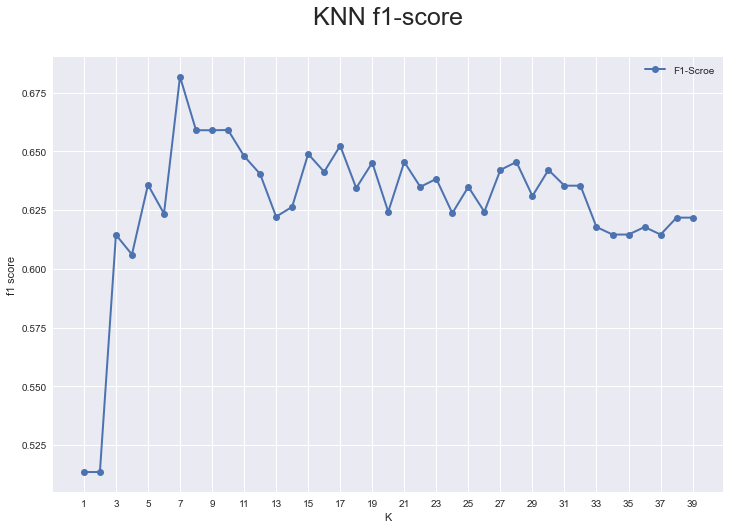

In [160]:
sns.set_style("darkgrid")
plt.figure(dpi=800)
ax = f1_results.set_index("K").plot(figsize=(12,8),linewidth=2, marker='o')
ax.set(xlabel='K',ylabel='f1 score')
ax.set_xticks(range(1,max_k,2))
plt.title("KNN f1-score\n", fontsize=25);

#### From bothe the graph we can say that k = 7 can be considered as optimal value

In [162]:
knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn.fit(X_res,y_res)
y_pred = knn.predict(X_test)

In [170]:
print("Actual Label:    ",list(y_test[10:20].astype('int32')))
print("Predicted Label: ",list(y_pred[10:20].astype('int32')))

Actual Label:     [0, 0, 1, 0, 1, 0, 1, 0, 0, 0]
Predicted Label:  [0, 0, 1, 1, 1, 0, 1, 0, 0, 0]


In [163]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Confusion Matrix: 
 [[100  43]
 [ 13  60]]


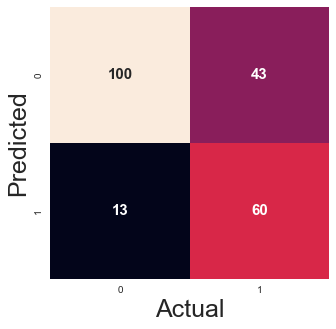

In [164]:
fig, ax = plt.subplots(figsize=(5,5))
ax=sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt='d', annot_kws={'size': 15,"weight":"bold"},cbar=False)
ax.set_ylabel("Predicted", fontsize = 25)
ax.set_xlabel("Actual", fontsize = 25);

In [168]:
print("\nClassification Report:\n", classification_report(y_test,y_pred))
print("\nROC AUC Score: ",roc_auc_score(y_test,y_pred))
print("\nAccuracy Score: ", accuracy_score(y_test,y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.58      0.69       143
         1.0       0.50      0.82      0.62        73

    accuracy                           0.66       216
   macro avg       0.68      0.70      0.66       216
weighted avg       0.74      0.66      0.67       216


ROC AUC Score:  0.7011686943193792

Accuracy Score:  0.6620370370370371


We got recall of __82%__ but accuracy is __66%__ because KNN focus on identifying False Negatives

## Support Vector Machine

In [169]:
from sklearn.svm import LinearSVC

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [174]:
estimator = Pipeline([('scaler',StandardScaler()),
                     ('linear_svc',LinearSVC(max_iter=100000))])
params = {
    'linear_svc__C': np.linspace(0.001,100)
}
grid = GridSearchCV(estimator,params,cv=5,verbose=True,n_jobs=-1,scoring='f1')

In [175]:
grid.fit(X_res,y_res)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('linear_svc',
                                        LinearSVC(max_iter=100000))]),
             n_jobs=-1,
             param_grid={'linear_svc__C': array([1.00000000e-03, 2.04179592e+00, 4.08259184e+00, 6.12338776e+00,
       8.16418367e+00, 1.02049796e+01, 1.22457755e+01, 1.42865714e+01,
       1.63273673e+01, 1.83681633e+01, 2.04089592e+01, 2.24497551e+01,
       2.4490551...
       5.71432857e+01, 5.91840816e+01, 6.12248776e+01, 6.32656735e+01,
       6.53064694e+01, 6.73472653e+01, 6.93880612e+01, 7.14288571e+01,
       7.34696531e+01, 7.55104490e+01, 7.75512449e+01, 7.95920408e+01,
       8.16328367e+01, 8.36736327e+01, 8.57144286e+01, 8.77552245e+01,
       8.97960204e+01, 9.18368163e+01, 9.38776122e+01, 9.59184082e+01,
       9.79592041e+01, 1.00000000e+02])},
             scoring='f1', verbose=True)

In [176]:
grid.best_params_

{'linear_svc__C': 10.204979591836734}

In [177]:
y_pred = grid.predict(X_test)

In [178]:
print("Actual Label:    ",list(y_test[10:20].astype('int32')))
print("Predicted Label: ",list(y_pred[10:20].astype('int32')))

Actual Label:     [0, 0, 1, 0, 1, 0, 1, 0, 0, 0]
Predicted Label:  [0, 0, 0, 1, 1, 0, 1, 0, 0, 0]


In [179]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Confusion Matrix: 
 [[106  37]
 [ 13  60]]


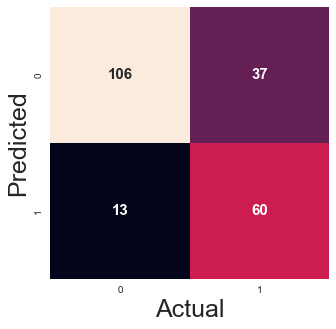

In [180]:
fig, ax = plt.subplots(figsize=(5,5))
ax=sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt='d', annot_kws={'size': 15,"weight":"bold"},cbar=False)
ax.set_ylabel("Predicted", fontsize = 25)
ax.set_xlabel("Actual", fontsize = 25);

In [181]:
print("\nClassification Report:\n", classification_report(y_test,y_pred))
print("\nROC AUC Score: ",roc_auc_score(y_test,y_pred))
print("\nAccuracy Score: ", accuracy_score(y_test,y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.74      0.81       143
         1.0       0.62      0.82      0.71        73

    accuracy                           0.77       216
   macro avg       0.75      0.78      0.76       216
weighted avg       0.80      0.77      0.77       216


ROC AUC Score:  0.7815882747389596

Accuracy Score:  0.7685185185185185


Recall remains same as KNN's but accuracy improved by 10%

## Random Forest

In [182]:
from sklearn.ensemble import RandomForestClassifier

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [189]:
estimator = RandomForestClassifier(n_estimators=300)
params = {'max_depth': range(5,20),
          'min_samples_split': np.arange(2,10)}

grid = GridSearchCV(estimator, params, cv=5, verbose=True, n_jobs=-1, scoring='f1')

In [190]:
grid.fit(X_res,y_res)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=300),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='f1', verbose=True)

In [191]:
grid.best_params_

{'max_depth': 16, 'min_samples_split': 4}

In [192]:
y_pred = grid.predict(X_test)

In [193]:
print("Actual Label:    ",list(y_test[10:20].astype('int32')))
print("Predicted Label: ",list(y_pred[10:20].astype('int32')))

Actual Label:     [0, 0, 1, 0, 1, 0, 1, 0, 0, 0]
Predicted Label:  [0, 0, 0, 1, 1, 0, 0, 0, 0, 0]


In [194]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Confusion Matrix: 
 [[120  23]
 [ 20  53]]


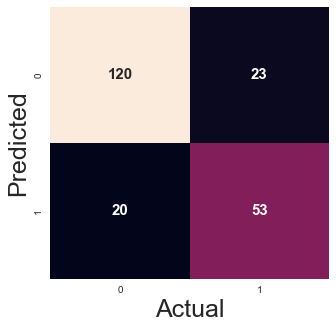

In [195]:
fig, ax = plt.subplots(figsize=(5,5))
ax=sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt='d', annot_kws={'size': 15,"weight":"bold"},cbar=False)
ax.set_ylabel("Predicted", fontsize = 25)
ax.set_xlabel("Actual", fontsize = 25);

In [196]:
print("\nClassification Report:\n", classification_report(y_test,y_pred))
print("\nROC AUC Score: ",roc_auc_score(y_test,y_pred))
print("\nAccuracy Score: ", accuracy_score(y_test,y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       143
         1.0       0.70      0.73      0.71        73

    accuracy                           0.80       216
   macro avg       0.78      0.78      0.78       216
weighted avg       0.80      0.80      0.80       216


ROC AUC Score:  0.7825941182105565

Accuracy Score:  0.8009259259259259


We got 80% accuracy with random forest

#### Let's see what we can do with combinig all the models with their best parameters

## Combining Models

In [197]:
from sklearn.ensemble import VotingClassifier

In [199]:
lr = LogisticRegression(solver='liblinear', penalty = 'l2', C = 2.0417959183673466)
knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
svc = LinearSVC(C=10.204979591836734)
rf = RandomForestClassifier(max_depth=16,min_samples_split=4,n_estimators=300)

In [201]:
eclf = VotingClassifier(estimators=[('clf1',lr),('clf2',knn),('clf3',svc),('clf4',rf)])

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [203]:
eclf.fit(X_res,y_res)

VotingClassifier(estimators=[('clf1',
                              LogisticRegression(C=2.0417959183673466,
                                                 solver='liblinear')),
                             ('clf2',
                              KNeighborsClassifier(n_neighbors=7,
                                                   weights='distance')),
                             ('clf3', LinearSVC(C=10.204979591836734)),
                             ('clf4',
                              RandomForestClassifier(max_depth=16,
                                                     min_samples_split=4,
                                                     n_estimators=300))])

In [204]:
y_pred = eclf.predict(X_test)

In [205]:
print("Actual Label:    ",list(y_test[10:20].astype('int32')))
print("Predicted Label: ",list(y_pred[10:20].astype('int32')))

Actual Label:     [0, 0, 1, 0, 1, 0, 1, 0, 0, 0]
Predicted Label:  [0, 0, 0, 1, 1, 0, 0, 0, 0, 0]


In [206]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Confusion Matrix: 
 [[126  17]
 [ 29  44]]


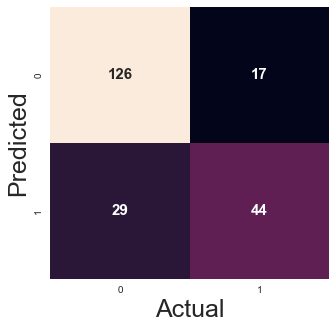

In [207]:
fig, ax = plt.subplots(figsize=(5,5))
ax=sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt='d', annot_kws={'size': 15,"weight":"bold"},cbar=False)
ax.set_ylabel("Predicted", fontsize = 25)
ax.set_xlabel("Actual", fontsize = 25);

In [208]:
print("\nClassification Report:\n", classification_report(y_test,y_pred))
print("\nROC AUC Score: ",roc_auc_score(y_test,y_pred))
print("\nAccuracy Score: ", accuracy_score(y_test,y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.88      0.85       143
         1.0       0.72      0.60      0.66        73

    accuracy                           0.79       216
   macro avg       0.77      0.74      0.75       216
weighted avg       0.78      0.79      0.78       216


ROC AUC Score:  0.7419293035731392

Accuracy Score:  0.7870370370370371


##  CONCLUSION

* Random Forest performed the best in terms of Accuracy - 80% with 73% Recall 😁
* Logistic Regression also performed good with Accuracy - 77% and recall - 84% 🙄
* Combined Model's accuracy is 78% but with recall 60% 😒